 SHAPE : (365, 4)

 TYPES :
 date            datetime64[us]
ventes_total           float64
nb_clients               int64
est_weekend               bool
dtype: object

 VALEURS MANQUANTES :
 date            0
ventes_total    0
nb_clients      0
est_weekend     0
dtype: int64

 STATISTIQUES :
                       date  ventes_total  nb_clients
count                  365        365.00      365.00
mean   2024-07-01 00:00:00        104.32       14.77
min    2024-01-01 00:00:00         64.15        4.00
25%    2024-04-01 00:00:00         90.02       12.00
50%    2024-07-01 00:00:00        104.70       15.00
75%    2024-09-30 00:00:00        117.34       17.00
max    2024-12-30 00:00:00        142.61       27.00
std                    NaN         16.28        4.06

  ANOMALIES :
  • Ventes négatives : 0
  • Clients = 0      : 0
  • Ventes > 200€    : 0

 KPI WEEKEND :
  • Moyenne weekend : 115.34€
  • Moyenne semaine : 99.93€
  • Boost           : +15.4%


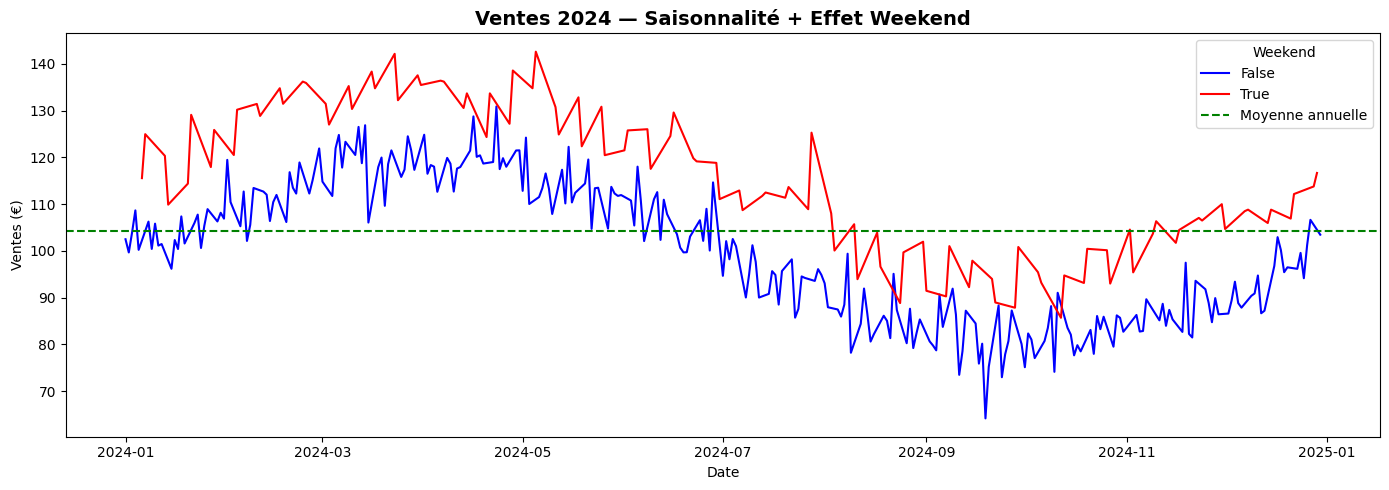

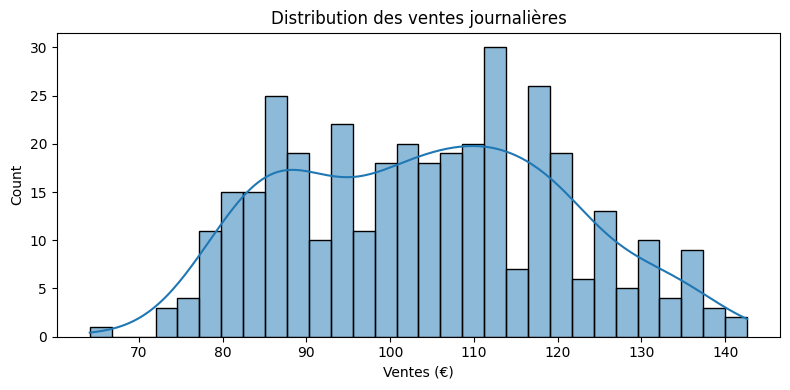

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données générées à l'étape 1
df = pd.read_csv("../data/generated/cafe_data_2024.csv")
df['date'] = pd.to_datetime(df['date'])  # Conversion obligatoire pour analyse temporelle

# 2. Diagnostic rapide des données
print(" SHAPE :", df.shape)           # (365, 4) → 365 jours, 4 colonnes
print("\n TYPES :\n", df.dtypes)      # Vérifier que 'date' est datetime64
print("\n VALEURS MANQUANTES :\n", df.isnull().sum())  # Doit être 0 partout
print("\n STATISTIQUES :\n", df.describe().round(2))  # Min/max/moyenne/écart-type

# 3. Détection d'anomalies métier
print("\n  ANOMALIES :")
print(f"  • Ventes négatives : {(df['ventes_total'] < 0).sum()}")
print(f"  • Clients = 0      : {(df['nb_clients'] == 0).sum()}")
print(f"  • Ventes > 200€    : {(df['ventes_total'] > 200).sum()}")  # Seuil métier à ajuster

# 4. Impact weekend (KPI décisionnel)
weekend_avg = df[df['est_weekend']]['ventes_total'].mean()
weekday_avg = df[~df['est_weekend']]['ventes_total'].mean()
boost_pct = ((weekend_avg / weekday_avg) - 1) * 100
print(f"\n KPI WEEKEND :")
print(f"  • Moyenne weekend : {weekend_avg:.2f}€")
print(f"  • Moyenne semaine : {weekday_avg:.2f}€")
print(f"  • Boost           : +{boost_pct:.1f}%")

# 5. Visualisation saisonnalité + weekend
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='date', y='ventes_total', hue='est_weekend', palette={True: 'red', False: 'blue'})
plt.axhline(y=df['ventes_total'].mean(), color='green', linestyle='--', label='Moyenne annuelle')
plt.title("Ventes 2024 — Saisonnalité + Effet Weekend", fontsize=14, fontweight='bold')
plt.ylabel("Ventes (€)")
plt.xlabel("Date")
plt.legend(title='Weekend')
plt.tight_layout()
plt.savefig("../outputs/figures/eda_ventes.png", dpi=150, bbox_inches='tight')
plt.show()

# 6. Distribution des ventes (détecter les outliers)
plt.figure(figsize=(8, 4))
sns.histplot(df['ventes_total'], bins=30, kde=True)
plt.title("Distribution des ventes journalières")
plt.xlabel("Ventes (€)")
plt.tight_layout()
plt.savefig("../outputs/figures/eda_distribution.png", dpi=150)
plt.show()